# Data Warehousing and Data Mining

## Labs

### Prepared by Gilroy Gordon

#### Contact Information

SCIT ext. 3643

ggordonutech@gmail.com

gilroy.gordon@utech.edu.jm

### Week 3 - Regression Analysis in Python


Additional Reference Resources:

http://scikit-learn.org/stable/modules/linear_model.html

Objectives
----
---
     
     > Data Transformation
     > Data Mining
          > Linear Regression
     > Model Evaluation and Prediction
          > Train/Test Split - 70/30
     > Presentation
          > Scatter Plot
    

## Import required libraries and acquire data

NB. The data required was retrieved from the required text for this course. This should assist you in following the concepts from the book better

In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = './data/Creditcardprom.csv' # Path to data file
data = pd.read_csv(data_path) 
data

,Income Range,Magazine Promo,Watch Promo,Life Ins Promo,Credit Card Ins.,Sex,Age
0,"40-50,000",Yes,No,No,No,Male,45
1,"30-40,000",Yes,Yes,Yes,No,Female,40
2,"40-50,000",No,No,No,No,Male,42
3,"30-40,000",Yes,Yes,Yes,Yes,Male,43
4,"50-60,000",Yes,No,Yes,No,Female,38
5,"20-30,000",No,No,No,No,Female,55
6,"30-40,000",Yes,No,Yes,Yes,Male,35
7,"20-30,000",No,Yes,No,No,Male,27
8,"30-40,000",Yes,No,No,No,Male,43
9,"30-40,000",Yes,Yes,Yes,No,Female,41


In [4]:
# What columns are in the data set ? Do they have spaces that I should consider
data.columns

Index(['Income Range', 'Magazine Promo', 'Watch Promo', 'Life Ins Promo',
       'Credit Card Ins.', 'Sex', 'Age'],
      dtype='object')

## Aim: Can we determine a person's age based on the other factors?

age = a(Income Range) + b(Magazine Promo) + c(Watch Promo) + d(Life Ins Promo)+ e(Credit Card Ins.) + f(Sex)

The coefficients a-f, what are they? What is the relationship between the variables? Does multicolinearity exist?

I have created a function below ```create_label_encoder_dict``` to assist with this. The function accepts a dataframe object and uses the ```LabelEncoder``` class from ```sklearn.preprocessing``` to encode (dummy encoding) or transform non-numerical columns to numbers. Finally it returns a dictionary object of all the encoders created for each column.

The LabelEncoder is a useful resource as it not only automatically transforms all values in a column but also keeps a track of what values were transformed from. i.e. It will change all ```Female``` to ```0``` and all ```Male``` to ```1```

In [7]:
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder
    
    label_encoder_dict = {}
    for column in df.columns:
        # Only create encoder for categorical data types
        if not np.issubdtype(df[column].dtype, np.number) and column != 'Age':
            label_encoder_dict[column]= LabelEncoder().fit(df[column])
    return label_encoder_dict

In [9]:
label_encoders = create_label_encoder_dict(data)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
    print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)

Encoded Values for each Label
Encoder(Sex) = ['Female' 'Male']
        Encoded Values
Female               0
Male                 1
Encoder(Income Range) = ['20-30,000' '30-40,000' '40-50,000' '50-60,000']
           Encoded Values
20-30,000               0
30-40,000               1
40-50,000               2
50-60,000               3
Encoder(Magazine Promo) = ['No' 'Yes']
     Encoded Values
No                0
Yes               1
Encoder(Watch Promo) = ['No' 'Yes']
     Encoded Values
No                0
Yes               1
Encoder(Life Ins Promo) = ['No' 'Yes']
     Encoded Values
No                0
Yes               1
Encoder(Credit Card Ins.) = ['No' 'Yes']
     Encoded Values
No                0
Yes               1


In [11]:
# Apply each encoder to the data set to obtain transformed values
data2 = data.copy() # create copy of initial data set
for column in data2.columns:
    if column in label_encoders:
        data2[column] = label_encoders[column].transform(data2[column])

print("Transformed data set")
print("="*32)
data2

Transformed data set


,Income Range,Magazine Promo,Watch Promo,Life Ins Promo,Credit Card Ins.,Sex,Age
0,2,1,0,0,0,1,45
1,1,1,1,1,0,0,40
2,2,0,0,0,0,1,42
3,1,1,1,1,1,1,43
4,3,1,0,1,0,0,38
5,0,0,0,0,0,0,55
6,1,1,0,1,1,1,35
7,0,0,1,0,0,1,27
8,1,1,0,0,0,1,43
9,1,1,1,1,0,0,41


In [16]:
# separate our data into dependent (Y) and independent(X) variables
X_data = data2[['Income Range','Sex','Life Ins Promo','Magazine Promo', 'Watch Promo']]
Y_data = data2['Age']

## 70/30 Train Test Split

We will split the data using a 70/30 split. i.e. 70% of the data will be randomly chosen to train the model
and 30% will be used to evaluate the model

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.30) 

In [14]:
# Import linear model package (has several regression classes)
from sklearn import linear_model


In [15]:
# Create an instance of linear regression
reg = linear_model.LinearRegression()

In [32]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
reg.coef_

array([  4.20886076,  -8.43037975, -17.51898734,   5.5       ,
         8.26582278])

In [34]:
X_train.columns

Index(['Income Range', 'Sex', 'Life Ins Promo', 'Magazine Promo',
       'Watch Promo'],
      dtype='object')

In [35]:
print("Regression Coefficients")
pd.DataFrame(reg.coef_,index=X_train.columns,columns=["Coefficient"])

Regression Coefficients


,Coefficient
Income Range,4.208861
Sex,-8.430380
Life Ins Promo,-17.518987
Magazine Promo,5.500000
Watch Promo,8.265823


In [36]:
# Intercept
reg.intercept_

42.658227848101255

In [42]:
# Make predictions using the testing set
test_predicted = reg.predict(X_test)
test_predicted

array([26.41772152, 48.14556962, 51.53164557, 43.11392405, 42.64556962])

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, test_predicted))

Mean squared error: 50.14


In [45]:
# Explained variance score: 1 is perfect prediction
# R squared
print('Variance score: %.2f' % r2_score(y_test, test_predicted))

Variance score: -3.57


In [47]:
help(reg.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Returns the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True values for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float


In [48]:
reg.score(X_test,y_test)

-3.5749185396313994

### Visualizations

It's difficult to plat a scatter plot with so many dimensions

How about Dimensionality Reduction?

One such method - Principal Component Analysis

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=1)

In [53]:
pca.fit(data2[X_train.columns])

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [54]:
pca.components_

array([[ 0.96117326, -0.10803145,  0.08602344,  0.23885282, -0.0049457 ]])

In [55]:
pca.n_features_

5

In [56]:
pca.n_components_

1

Now that we can reduce our components(factors/features) let us plot (X against y)


In [59]:
#Again :
X_test

,Income Range,Sex,Life Ins Promo,Magazine Promo,Watch Promo
6,1,1,1,1,0
0,2,1,0,1,0
12,3,0,1,1,1
1,1,0,1,1,1
2,2,1,0,0,0


In [60]:
X_reduced = pca.transform(X_test)
X_reduced

array([[-0.15821581],
       [ 0.71693401],
       [ 1.86721646],
       [-0.05513007],
       [ 0.47808119]])

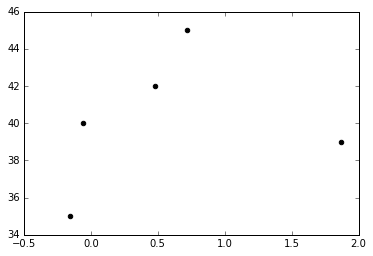

In [61]:
plt.scatter(X_reduced, y_test,  color='black')

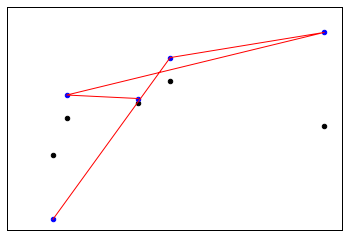

In [64]:
plt.scatter(X_reduced, y_test,  color='black')
plt.scatter(X_reduced, test_predicted, color='blue')
plt.plot(X_reduced, test_predicted, color='red',linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

## Not very insightful? Let us discuss this in class